# Verify Data loading

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-32.961193..4.7794].


S1A_IW_GRDH_1SDV_20170802T163350_34TCR_28_12 S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_28_12 7180 7180


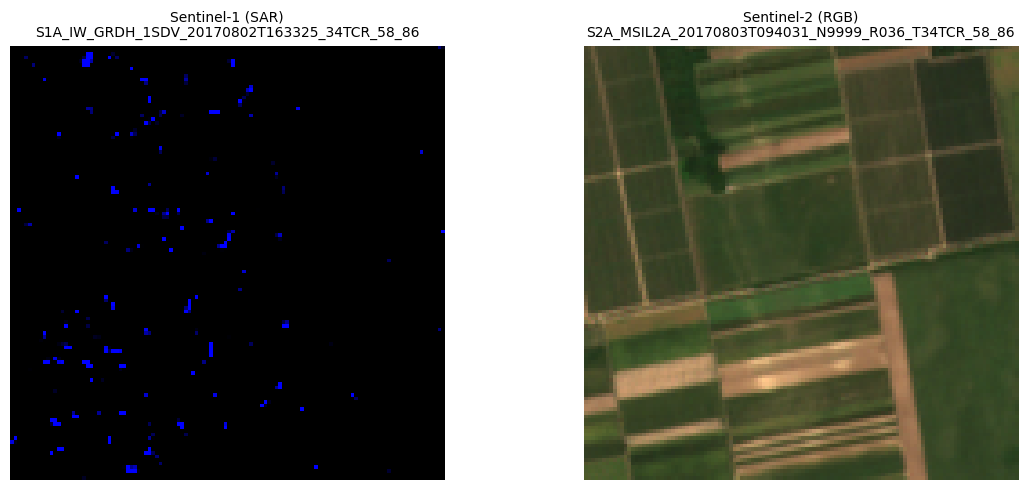

In [1]:
from data_loading_v2 import MultiChannelDataset
import torchvision.transforms.v2 as v2
from transforms import make_transforms

dataset_root1 = '/Users/narendraaironi/projects/biplab/JEPA/data/BEN_14k/BigEarthNet-S1'
dataset_root2 = '/Users/narendraaironi/projects/biplab/JEPA/data/BEN_14k/BigEarthNet-S2'
metadata = '/Users/narendraaironi/projects/biplab/JEPA/data/BEN_14k/serbia_metadata.parquet'

transform = make_transforms(12)
train_ds = MultiChannelDataset(dataset_root1, dataset_root2, metadata, 'train', transform)

print(train_ds.metadata1[0], train_ds.metadata2[0], len(train_ds.metadata1), len(train_ds.metadata2))

fig = train_ds.plot(456)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-22058.496..42868.43].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.38676333..3.21406].


tensor([[[-0.0223,  0.1611,  0.0730],
         [-0.0238,  0.1519,  0.0579],
         [-0.0271,  0.1312,  0.0237],
         ...,
         [ 2.4426,  2.1563,  2.1204],
         [ 2.5569,  2.2460,  2.1285],
         [ 2.6076,  2.2857,  2.1320]],

        [[-0.0301,  0.1401,  0.0653],
         [-0.0312,  0.1332,  0.0518],
         [-0.0339,  0.1177,  0.0213],
         ...,
         [ 2.4740,  2.1817,  2.1703],
         [ 2.5783,  2.2829,  2.2009],
         [ 2.6245,  2.3278,  2.2145]],

        [[-0.0438,  0.1030,  0.0516],
         [-0.0444,  0.1002,  0.0410],
         [-0.0458,  0.0940,  0.0170],
         ...,
         [ 2.5293,  2.2265,  2.2584],
         [ 2.6160,  2.3481,  2.3288],
         [ 2.6544,  2.4019,  2.3601]],

        ...,

        [[ 0.2074,  0.0388,  0.1271],
         [ 0.2052,  0.0365,  0.1502],
         [ 0.2002,  0.0313,  0.2023],
         ...,
         [ 1.7689,  1.4339,  1.5908],
         [ 1.7436,  1.3922,  1.5550],
         [ 1.7324,  1.3737,  1.5392]],

        [[

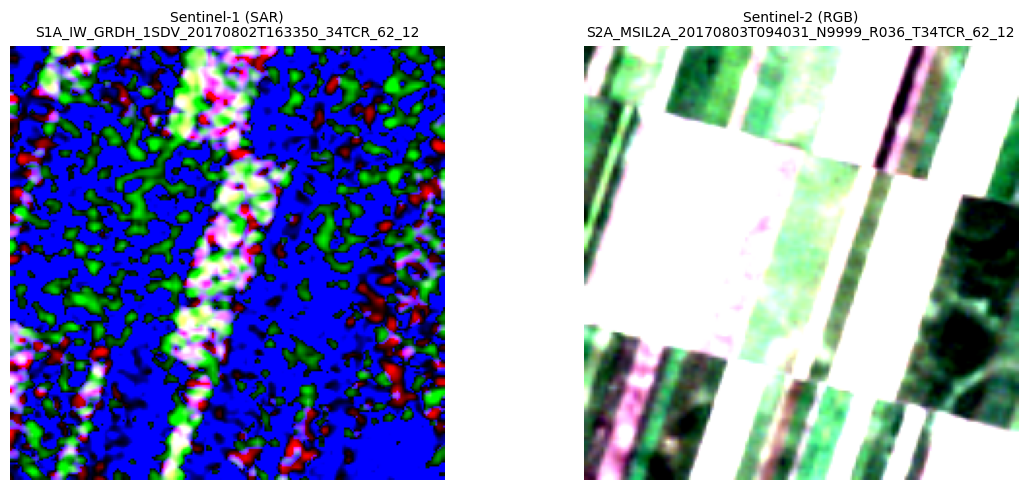

In [2]:
import matplotlib.pyplot as plt
import numpy as np

idx = 545
s1_img, s2_img = train_ds[idx]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
vv = s1_img[0]  # VV polarization
vh = s1_img[1]  # VH polarization

Z = vv**2 + vh**2

# vv_norm = (vv - vv.min()) / (vv.max() - vv.min())
# vh_norm = (vh - vh.min()) / (vh.max() - vh.min())
vv_norm = vv
vh_norm = vh

vv_vh_ratio = vv_norm / vh_norm
s1_rgb = np.stack([vv_norm, vh_norm, vv_vh_ratio], axis=-1)
# A=np.abs(Z.numpy())
# Am=np.mean(A)
# As=np.std(np.abs(A))
# plt.figure(figsize=(4,4))
# axes[0].imshow(20*np.log10(np.abs(Z)),cmap='gray')
axes[0].imshow(s1_rgb)
axes[0].set_title(f'Sentinel-1 (SAR)\n{train_ds.metadata1[idx]}', fontsize=10)
axes[0].axis('off')

rgb = s2_img[[2, 1, 0], :, :]  # Convert BGR to RGB

# rgb_norm = rgb / rgb.max()
rgb_norm = np.transpose(rgb, (1, 2, 0))  # CHW to HWC
print(np.round(rgb_norm, 4))
axes[1].imshow(rgb_norm)
axes[1].set_title(f'Sentinel-2 (RGB)\n{train_ds.metadata2[idx]}', fontsize=10)
axes[1].axis('off')

plt.tight_layout()
